# **Sentiment Analysis**

Duygu analizi, belirli konu hakkında bir cümlenin ya da textin duygu içerip içermediğini anlamak için yapılan çalışmalardır.

IMDb Movie Review datası kullanılarak, datada bulunan görüşlerin negatif mi pozitif mi olduğunun analizi yapılacaktır.

IMDb (Internet Movie Data base): Çevrimiçi veritabanı

**Importing Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

**Importing Data**

In [2]:
from keras.datasets import imdb
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(path = "ibdb.npz",
                                                       num_words= None,
                                                       skip_top = 0, 
                                                       #en sık kullanılan kelimelerin ignore edilip edilmeyeceğini belirler.
                                                       maxlen = None,
                                                       #yorumların uzunluğuna sınır koyulur.
                                                       seed = 113,
                                                       #data üretilirken shuffle yapılır/random bir şekilde karıştırılır.
                                                       #seed 113 ile keras dokümantasyonundaki aynı sırayla verir.
                                                       start_char = 1,
                                                       #0'dan başlarsa boş karakterlerden başlar.
                                                       #en çok kullanılan kelime 1'dir. 
                                                       #bu şekilde devam eder.
                                                       oov_char = 2,
                                                       index_from = 3)

Dataset train datasetinde 25000, test datasetinde 25000 olmak üzere toplamda 50000 film görüşünden oluşur.

Bu görüşler pozitif ve negatif olarak labellanmıştır.

Dataset en çok kullanılan kelimelerden başlayarak integer'a çevrilmiştir.

Bir şey ifade etmeyen  kelimeler ya da boşluk 0 olarak ineteger'a çevrilmiştir.

In [3]:
print("Type of x_train: ", type(X_train))
print("Type of y_train: ", type(Y_train))
print("Type of x_test: ", type(X_test))
print("Type of y_test: ", type(Y_test))

Type of x_train:  <class 'numpy.ndarray'>
Type of y_train:  <class 'numpy.ndarray'>
Type of x_test:  <class 'numpy.ndarray'>
Type of y_test:  <class 'numpy.ndarray'>


Datada bulunan kelimeler integer'a çevrildiği için numpy array türündedir.

In [4]:
print("X train shape: ",X_train.shape)
print("Y train shape: ",Y_train.shape)
print("X test shape: ",X_test.shape)
print("Y test shape: ",Y_test.shape)

X train shape:  (25000,)
Y train shape:  (25000,)
X test shape:  (25000,)
Y test shape:  (25000,)


**Exploratory Data Analysis**

In [5]:
print("Y train values: ",np.unique(Y_train))
print("Y test values: ",np.unique(Y_test))

Y train values:  [0 1]
Y test values:  [0 1]


0 ve 1 olmak üzere 2 tane class bulunur.

0 negatif görüşü, 1 pozitif görüşü ifade eder.

In [6]:
unique, counts = np.unique(Y_train, return_counts = True)
print("Y train distribution: ",dict(zip(unique,counts)))

Y train distribution:  {0: 12500, 1: 12500}


In [7]:
unique, counts = np.unique(Y_test, return_counts = True)
print("Y test distribution: ",dict(zip(unique,counts)))

Y test distribution:  {0: 12500, 1: 12500}


y_train ve y_test datalarında 12500 pozitif görüş, 12500 negatif görüş bulunmaktadır.

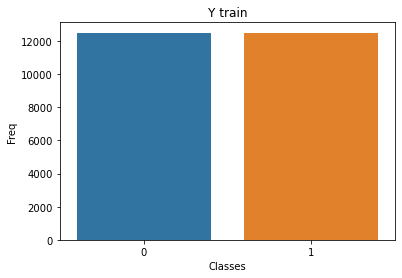

In [8]:
plt.figure()
sns.countplot(Y_train)
plt.xlabel("Classes")
plt.ylabel("Freq")
plt.title("Y train")
plt.show()

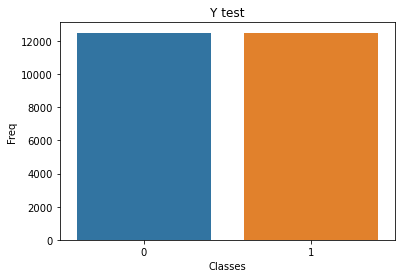

In [9]:
plt.figure()
sns.countplot(Y_test)
plt.xlabel("Classes")
plt.ylabel("Freq")
plt.title("Y test")
plt.show()

Count plot ile classlardaki y_train ve y_test datalarındaki class dağılımı görselleştirilmiştir.

In [10]:
d = X_train[0]
print(d)
print(type(d[0]))
print(len(d))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
<class 'int'>
218


x_train'in 0. indeksinde 218 tane integer sayı bulunmaktadır.

Minimum review from train data is 11
Minimum review from test data is 7
Maximum review from train data is 2494
Maximum review from train data is 2315


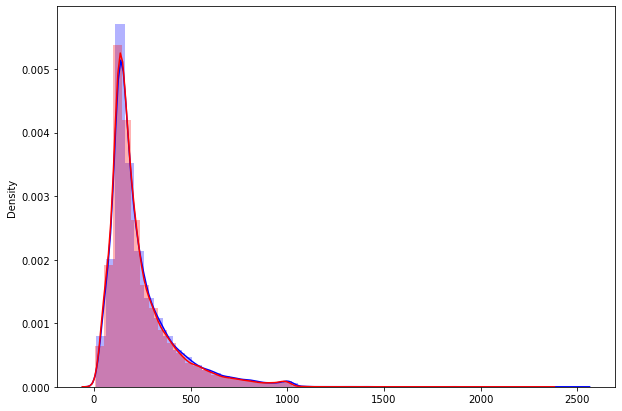

In [11]:
review_len_train = []
review_len_test = []
for i, j in zip(X_train, X_test):
    review_len_train.append(len(i))
    review_len_test.append(len(j))
print("Minimum review from train data is",min(review_len_train))
print("Minimum review from test data is",min(review_len_test))
print("Maximum review from train data is",max(review_len_train))
print("Maximum review from train data is",max(review_len_test))
plt.figure(figsize=(10,7))
sns.distplot(review_len_train, hist_kws = {"alpha":0.3}, color = "blue")
sns.distplot(review_len_test, hist_kws = {"alpha":0.3} , color = "red")
plt.show()

x_train ve x_test datalarında bulunan görüşlerin uzunlukları listeler içerisinde depolanıp görselleştirilmiştir.

Bu görselleştirme ile yorumların dağılımına bakılmıştır.

Train ve test datasının dağılımları üst üste oturmuştur.

Kuyruk sağa doğru uzadığından pozitif skewnesslık görülür.

In [12]:
from scipy import stats
print("Train mean:", np.mean(review_len_train))
print("Train median:", np.median(review_len_train))
print("Train mode:", stats.mode(review_len_train))

Train mean: 238.71364
Train median: 178.0
Train mode: ModeResult(mode=array([132]), count=array([196]))


Bazı yorumlarda 2300,2400 kelime bulunurken, bazı yorumlarda 15,20 kelime kullanılmıştır.

Keras kütüphanesinde kullanılmak için inputlar aynı size'da olmalıdır.

Bu yüzden inputlar mod değerine göre belli bir size'a koyularak sınırlandırılacaktır.

In [13]:
word_index = imdb.get_word_index()
print(type(word_index))
print(len(word_index))

<class 'dict'>
88584


Kaç unique kelime olduğu hesaplanmıştır.

In [14]:
for keys, values in word_index.items():
    if values <= 10:
        print(values,keys)

10 i
9 it
6 is
8 in
4 of
3 a
7 br
1 the
2 and
5 to


En çok kullanılan 10 kelime yazdırılmıştır.

In [15]:
def whatItSay(index = 24):
    
    reverse_index = dict([(value, key) for (key, value) in word_index.items()])
    decode_review = " ".join([reverse_index.get(i - 3, "!") for i in X_train[index]])
    print(decode_review)  #yorum
    print(Y_train[index]) #yorumun label'ı
    return decode_review

In [16]:
decoded_review = whatItSay()

! the original demille movie was made in 1938 with frederic march a very good film indeed hollywood's love of remakes brings us a fairly interesting movie starring yul brynner he of course was brilliant as he almost always seemed to be in all of his movies charlton heston as andrew jackson was a stroke of genius however the movie did tend to get a little long in places it does not move at the pace of the 1938 version still it is a fun movie that should be seen at least once
1


24. indeksteki görüş ve o yorumun label'ı yazdırılmıştır.

1 -> olumlu görüş

0 -> olumsuz görüş

**Data Preprocessing**

Keras kütüphanesiyle neural network eğitilirken input olarak girdi sağlanacak verinin boyutu aynı olmak zorundadır.

pad sequences methoduyla input datasında bulunan cümlelerin boyutları fixlenir.

Her cümle aynı boyuta getirilir.

In [19]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
num_words = 15000 #kelime sayısı 88584'ten 15000'e düşürüldü.
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=num_words)
#15000 kelime kullanılabilmek için veriseti tekrardan çağrılır.

maxlen = 132 #yorumların maximum boyutu mod kadar belirlendi.
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)
#train ve test datalarındaki yorumlara sınır getirildi.

print(X_train[5]) #x_train'in 5. indeksindeki yoruma bakılır.

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    1  778  128   74   12  630  163   15    4
 1766 7982 1051    2   32   85  156   45   40  148  139  121  664  665
   10   10 1361  173    4  749    2   16 3804    8    4  226   65   12
   43  127   24    2   10   10]


132 kelimeye tamamlanabilmek için cümlenin başına anlamsız kelimeler getirilmiştir.

In [20]:
for i in X_train[0:10]:
    print(len(i))

132
132
132
132
132
132
132
132
132
132


İlk 10 indeksteki yorumların uzunluğuna bakılmıştır.

Tüm yorumların uzunluğunun mod değerine sabitlendiği görülür.

In [21]:
decoded_review = whatItSay(5)

! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! begins better than it ends funny that the russian submarine crew ! all other actors it's like those scenes where documentary shots br br spoiler part the message ! was contrary to the whole story it just does not ! br br
0


Yorumun başına getirilen ünlem işaretleri, yorumu 132 karaktere doldurmak için getirilen unknown karakterlerdir.

**Recurrent Neural Network**

Text işlemi yapıldığından time sequence durumu vardır.

**time sequence:** kelimelerin art arda gelmesiden bir dizilim söz konusudur.

RNN'de short memory bulunur. Bir önceki node'da olanları hatırlar.

RNN aldığı bir input'u output'a vermesine rağmen kendisini o inputla besler ve unutmaz. Bir sonraki node'a ya da layer'a geçtiğinde daha önceden öğrendiği hafızasındadır.

Geçmişe dayalı gelecekle ilgili prediction ya da classify yapabilirler.

In [24]:
from keras.models import Sequential
from tensorflow.keras.layers import Embedding
from keras.layers import SimpleRNN, Dense, Activation

rnn = Sequential()

rnn.add(Embedding(num_words, 32, input_length = len(X_train[0])))
#num_words -> input dimension
#32 -> output dimension
#input_length -> yorumun uzunluğu (mod değeri)

rnn.add(SimpleRNN(16, input_shape = (num_words,maxlen), return_sequences= False, activation= "relu"))
#16 -> output space -> 16 node
#input_shape -> 15000 kelime, yorumların uzunluğu 132

rnn.add(Dense(1))
#flatten layer

rnn.add(Activation("sigmoid"))
#Classification olumlu-olumsuz şeklinde olduğundan binary classsification'dır.
#bu yüzden output layer'ın activation function'ı sigmoid'dir.

Embedding layer'ı integerları belirli boyutlarda yoğunluk vektörlerine çevirir.

In [25]:
print(rnn.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 132, 32)           480000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 16)                784       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 480,801
Trainable params: 480,801
Non-trainable params: 0
_________________________________________________________________
None


Layerların, parametrelerin sayısı yazdırılmıştır.

In [26]:
rnn.compile(loss = "binary_crossentropy", optimizer="rmsprop",metrics= ["accuracy"])

**Training RNN Model**

In [27]:
history = rnn.fit(X_train, Y_train, validation_data= (X_test, Y_test), epochs=15, batch_size= 128, verbose=1)

Epoch 1/15
196/196 [==============================] - 8s 33ms/step - loss: 0.6745 - accuracy: 0.5865 - val_loss: 0.6130 - val_accuracy: 0.7045
Epoch 2/15
196/196 [==============================] - 6s 32ms/step - loss: 0.4936 - accuracy: 0.7790 - val_loss: 0.4122 - val_accuracy: 0.8225
Epoch 3/15
196/196 [==============================] - 6s 32ms/step - loss: 0.3567 - accuracy: 0.8505 - val_loss: 0.3692 - val_accuracy: 0.8401
Epoch 4/15
196/196 [==============================] - 7s 34ms/step - loss: 0.2820 - accuracy: 0.8858 - val_loss: 0.3325 - val_accuracy: 0.8585
Epoch 5/15
196/196 [==============================] - 6s 32ms/step - loss: 0.2277 - accuracy: 0.9109 - val_loss: 0.3470 - val_accuracy: 0.8494
Epoch 6/15
196/196 [==============================] - 6s 32ms/step - loss: 0.1929 - accuracy: 0.9260 - val_loss: 0.3352 - val_accuracy: 0.8624
Epoch 7/15
196/196 [==============================] - 6s 32ms/step - loss: 0.1617 - accuracy: 0.9378 - val_loss: 0.4527 - val_accuracy: 0.8449

In [ ]:
#model save
rnn.save_weights("sentiment_analysis.h5")

In [ ]:
#save history
import json
with open("sentiment_analysis.json","w") as f:
    json.dump(history.history,f)

**Evaluation of Model**

In [37]:
score = rnn.evaluate(X_test, Y_test)
print("Accuracy: %",score[1]*100)

782/782 [==============================] - 4s 5ms/step - loss: 0.5762 - accuracy: 0.8424
Accuracy: % 84.23600196838379


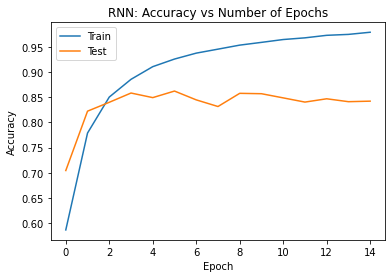

In [42]:
plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("RNN: Accuracy vs Number of Epochs")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

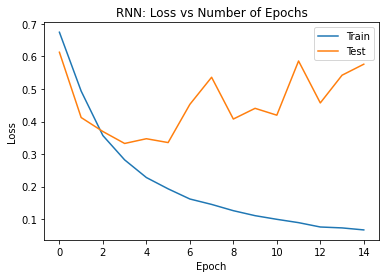

In [43]:
plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("RNN: Loss vs Number of Epochs")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()